# Определение перспективного направления в продаже игр

Для того, чтобы скорректировать рекламные компании, необходимо понять, какие именно жанры и платформы наиболее прибыльны и популярны. В нашем распоряжении данные игровой индустрии за 1980-2016 годы.

Необходимо:
- составить портрет пользователя каждого региона
- Ответить на следующие вопросы:
    1. Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?
    2. Разные ли средние пользовательские рейтинги жанров Action и Sports?

В таблице games 16713 строк и следующие столбцы:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB.

Данные за 2016г. не полные.

## Предобработка данных

In [1]:
#импорт библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import rcParams
from scipy import stats
import math

#настройка параметров отображения
rcParams['figure.figsize'] = 10, 6
pd.options.display.float_format = "{:.2f}".format

#импорт данных
games = pd.read_csv('/datasets/games.csv', decimal=',')

In [2]:
#первичный осмотр
display(games.head(10))
display(games.tail(10))
print(games.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.2,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.5,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.7,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.0,0.01,0.0,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.0,0.0,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,0.01,0.0,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.0,0.0,0.01,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null object
Genre              16713 non-null object
NA_sales           16715 non-null object
EU_sales           16715 non-null object
JP_sales           16715 non-null object
Other_sales        16715 non-null object
Critic_Score       8137 non-null object
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: object(11)
memory usage: 1.4+ MB
None


In [3]:
#приведение названий колонок к нижнему регистру 
games.columns = games.columns.str.lower()
display(games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN


In [4]:
#вычисляем процент пропусков значений для столбцов 'critic_score', 'user_score', 'rating'
#создает словарь с данными колонками
scores = ['critic_score', 'user_score', 'rating']
#создаем DF на основании этих колонок
missing_data_by_scores = pd.DataFrame(columns = scores)
#получаем список платформ
   = games.platform.value_counts().index.tolist()

#цикл для наполнений каждой колонки
for i in scores:
    #новый DF для удобного подсчета значений
    plat = pd.DataFrame(columns = platforms)
    column = i
    #цикл для перебора платформ
    for a in platforms:
        #фильтруем по платформе
        locked = games.loc[games['platform'] == a]
        #получаем количество пропусков
        plat[a] = locked[column].isna().value_counts()
        #транспонирование таблицы для удобства чтения
        plat_transposed = plat.T
        #переименование колонок промежуточной таблицы (т.к. False/True не могут быть выбраны в качестве индекса при индексации)
        plat_transposed.columns = ['Не пропущены','Пропущены']
        #процентное определение количества пропусков в колонках для каждой платформы
        missing_data_by_scores[column] = plat_transposed["Пропущены"] / (plat_transposed["Не пропущены"] + plat_transposed["Пропущены"]) * 100

In [5]:
display(missing_data_by_scores.sort_values(by="critic_score"))

,critic_score,user_score,rating
XB,12.01,10.68,11.04
GC,19.42,15.65,15.65
PC,26.59,15.91,20.53
X360,27.42,16.80,16.64
XOne,31.58,21.86,24.70
PS4,35.71,32.91,34.95
PS3,38.39,27.57,28.47
WiiU,38.78,28.57,28.57
PS2,39.94,31.47,31.47
GBA,46.72,37.10,36.50


### Вывод

Для множества платформ отсутствуют значения трех колонок - 'critic_score', 'user_score', 'rating'. Данные пропуски не могут быть случайными. Учитывая то, что данные платформы много лет как устарели, можно предположить, что оценка этих игр просто отсутствовала. (тем более, что ESRB основана в 1994 году, а многие платформы вышли раньше).

У платформы DC пропущено одинаковое количество оценок для всех колонок. Это требует уточнения.

Для остальных платформ пропуски хаотичные, первичный поиск игр этих платформ в сети интернет говорит о том, что не все рейтинги присутствуют. Скорее всего эти пропуски - из-за отсутствия оценок.

Платформы, где нет ни одной оценки, следует собрать в отдельную таблицу (old_platforms).

In [6]:
#уточнение пропущенных колонок для платформы DC
display(games.loc[games['platform'] == "DC"].head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
643,Sonic Adventure,DC,1998.0,Platform,1.26,0.61,0.46,0.08,NaN,NaN,NaN
966,Crazy Taxi,DC,2000.0,Racing,1.1,0.51,0.12,0.08,NaN,NaN,NaN
1679,NFL 2K,DC,1999.0,Sports,1.12,0.05,0.0,0.02,NaN,NaN,NaN
1712,Shenmue,DC,1999.0,Adventure,0.52,0.24,0.38,0.04,88.0,9.4,T
1787,Resident Evil - Code: Veronica,DC,2000.0,Action,0.41,0.23,0.47,0.03,NaN,NaN,NaN
1877,NFL 2K1,DC,2000.0,Sports,1.02,0.05,0.0,0.02,97.0,6,E
3815,Seaman,DC,1999.0,Simulation,0.0,0.0,0.52,0.0,82.0,8.4,T
4665,Sega Rally Championship 2,DC,1999.0,Racing,0.0,0.0,0.41,0.0,NaN,NaN,NaN
5145,Virtua Fighter 3tb,DC,1998.0,Fighting,0.0,0.0,0.37,0.0,NaN,NaN,NaN
5240,J-League Pro Soccer Club o Tsukurou!,DC,1999.0,Sports,0.0,0.0,0.36,0.0,NaN,NaN,NaN


### Вывод

На www.metacritic.com:
1. NFL 2K - отсутствует
2. Crazy Taxi - отсутствует
3. Sonic Adventure - отсутствует
4. Sega Rally Championship 2 - отсутствует
5. Virtua Fighter 3tb - отсутствует
6. J-League Pro Soccer Club o Tsukurou! - отсутствует

Это говорит нам о том, что данных для этих игр просто нет, т.к. на сайтах оценок они не зарегистрированы

In [7]:
#создание пустого списка
old_platforms = []
#заливка пропущенных значений флагом -1 для возможности фильтрации
missing_data_by_scores.fillna(value = -1, inplace=True)
#поиск пропущенных значений во всех трех колонках
for index, row in missing_data_by_scores.iterrows():
    if (row["critic_score"] == -1) & (row["user_score"] == -1) & (row["rating"] == -1):
        #создание списка на основании пропущенных значений
        old_platforms.append(index)

print(old_platforms)

['N64', 'SNES', 'SAT', '2600', 'NES', 'GB', 'GEN', 'NG', 'WS', 'SCD', '3DO', 'TG16', 'GG', 'PCFX']


### Вывод

Отдельно сохранен список со старыми платформами, по которым не велась статистика оценок и для которых нет рейтинга определенного ESRB.

In [8]:
#опредление количества пропущенных значений для остальных колонок
is_nan  = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
nans = pd.DataFrame(columns = is_nan)

for i in is_nan:
    nans[i] = games[i].isna().value_counts()

In [9]:
display(nans)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
False,16713,16715.00,16446,16713,16715.00,16715.00,16715.00,16715.00,8137,10014,9949
True,2,nan,269,2,nan,nan,nan,nan,8578,6701,6766


### Вывод

Строки с пропущенными значениями в колонке "name" и "year_of_release" можно удалить, так как они не могут служить для нас данными, на основании которых мы будет подтверждать/опровергать гипотезы, тем более что потеря данных незначительна.

При этом пропущенных значений в колонках продаж нет, но есть пропущенные значения в колонках оценки критиков/пользователей/рейтинга. Так как эти значения важны, мы пометим их флагом (значением -1). Ранее мы сохранили список платформ, для которых не было ни одной оценки.

Значение tbd - "to be determined", т.е. будет определено. Т.к. нам все равно, по какой причине значения отсутствуют (ошибка/малое количество оценок для расчета и т.д.), он так же будет заменен на флаг (-1).

In [10]:
#удаление пропущенных значений для колонок 'name' и 'year_of_release'
games.dropna(subset=['name', 'year_of_release'], inplace=True)
#заливка пропущенных значений остальных колонок флагом -1
games.fillna(value = -1, inplace=True)

#смена аббревиатуры tbd на флаг -1 для последующего преобразования типов
def to_tbd(x):
    if x == "tbd":
        return -1
    else:
        return x

games["user_score"] = games["user_score"].apply(to_tbd)

#преобразование типов из object в float64
to_numeric = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

for i in to_numeric:
    games[i] = pd.to_numeric(games[i])
    
#преобразование значений колонки "critic_score" в тип int64
games['critic_score'] = games['critic_score'].astype('int64')

#преобразование колонки 'year_of_release' в тип int64
games['year_of_release'] = pd.to_numeric(games['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int64')

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Вывод

- Произведено удаление пропущенных значений в колонках 'name', 'year_of_release'
- В остальных колонках пропущенные значения (в том числе и "tbd") помечены флагом -1
- Колонки 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score' преобразованы в тип float64
- Колонка 'critic_score' в тип int64
- Колонка 'year_of_release' преобразована в int 64, потому что из даты нам нужен только год

In [12]:
#подсчет суммарных продаж по все региона и создание отдельной колонки общих продаж
for index, row in games.iterrows():
    games.at[index, "all_sales"] = row["na_sales"] + row["eu_sales"] + row["jp_sales"] + row["other_sales"]

In [13]:
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.00,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.00,-1,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.00,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.00,-1,0.01


### Вывод

Посчитаны суммарные продажи со всех регионов (na/eu/jp/other), помещены в отдельную колонку (all_sales)

## Исследовательский анализ данных

,name
count,37.00
mean,444.43
std,451.60
min,9.00
25%,36.00
50%,338.00
75%,762.00
max,1427.00


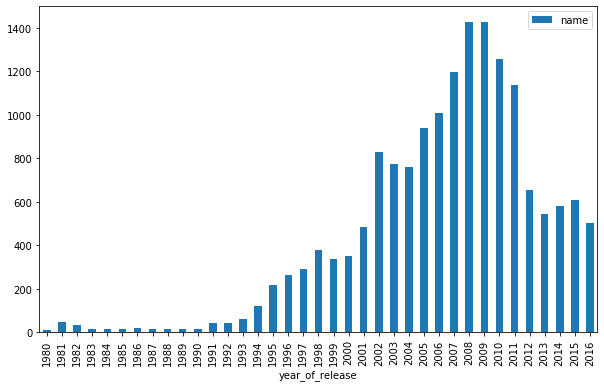

In [14]:
#просмотр количества выпущенных игр по годам
games_by_years = pd.pivot_table(games, index = 'year_of_release', values = 'name', aggfunc="count")
games_by_years.plot(kind='bar')
games_by_years.describe()

### Вывод

Резкий подъем в выпускаемом количестве игр начинается с 1994 года. С 1995 года начинается их систематизация и регулярное выставление оценок, к тому же в 1994 появляется рейтинг возрастных групп ESRB.

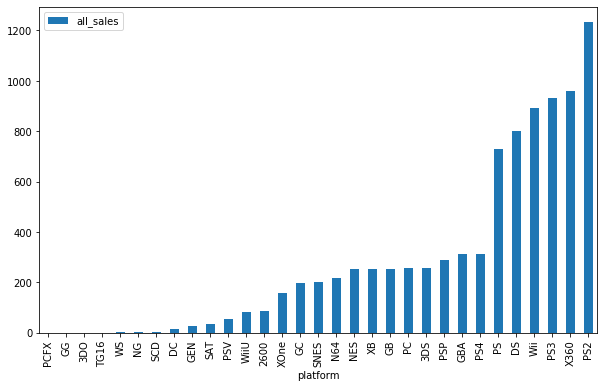

In [15]:
#просмотр общих продаж по платформам
sales_by_platforms = pd.pivot_table(games, index = 'platform', values = 'all_sales', aggfunc="sum")
sales_by_platforms.sort_values(by="all_sales").plot(kind='bar')

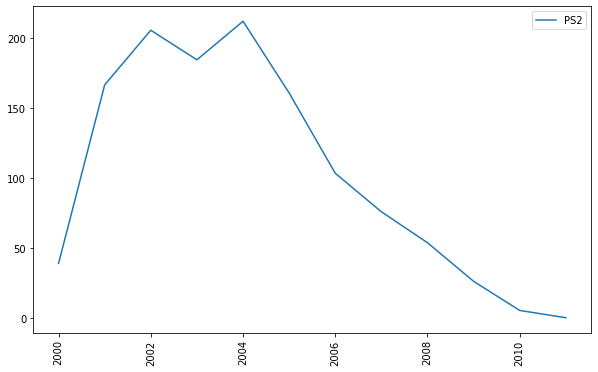

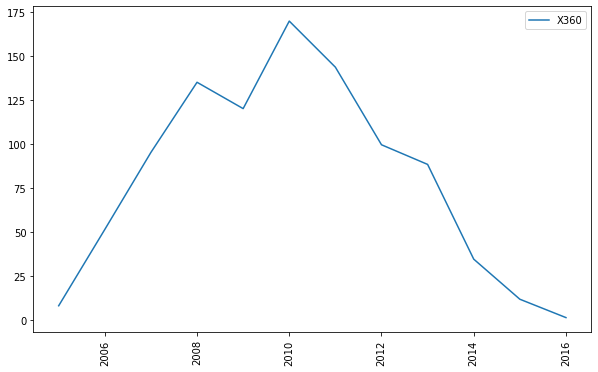

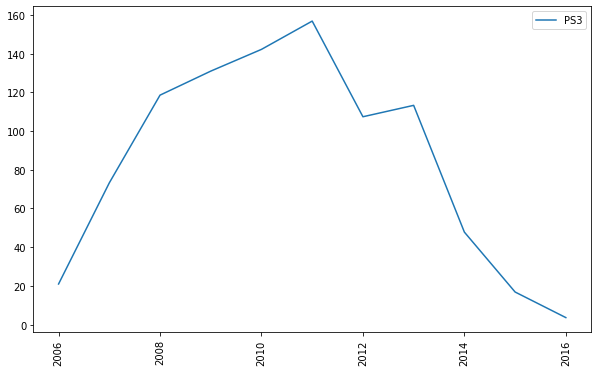

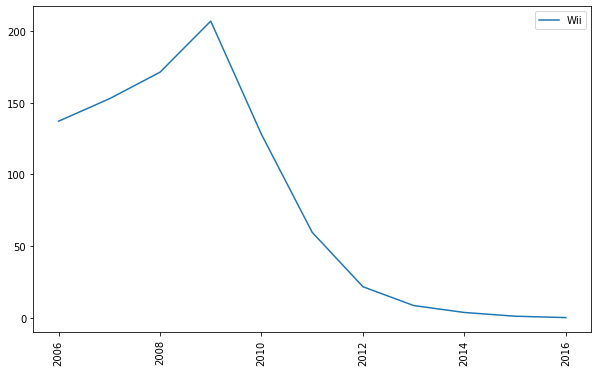

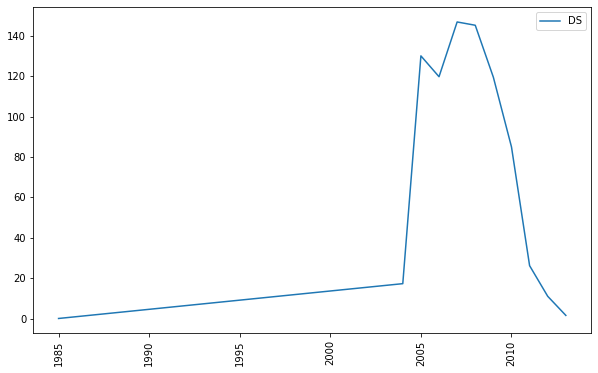

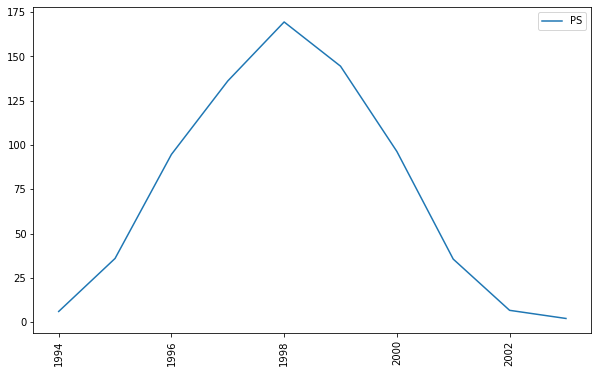

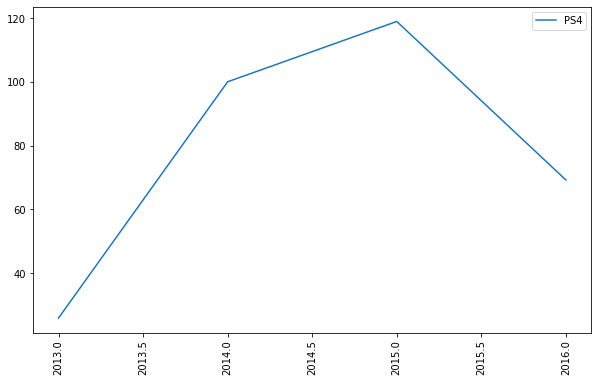

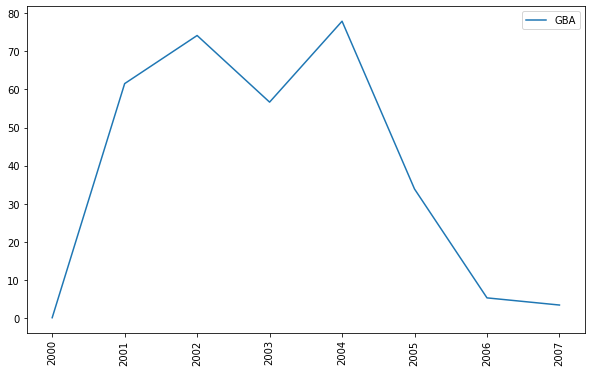

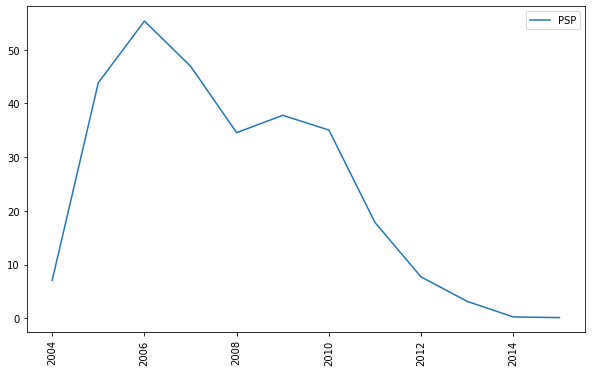

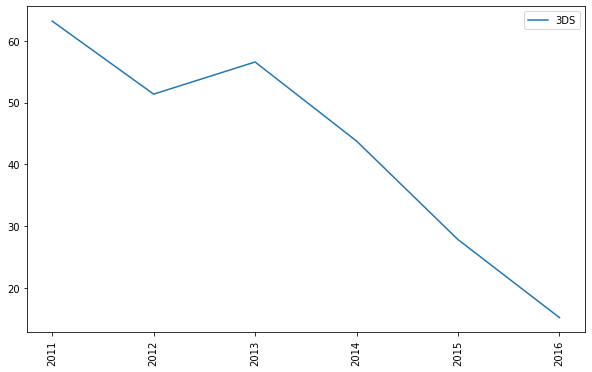

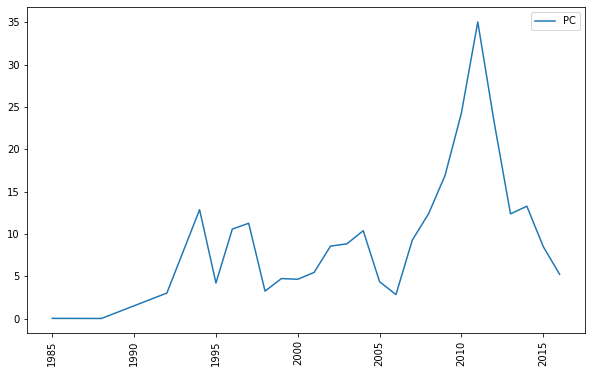

In [16]:
#определение первых 11 платформ по продажам
top_platforms = sales_by_platforms.sort_values(by="all_sales").nlargest(11, "all_sales", keep="first").index

#построение гистограмм по каждой платформе (топ-11)
for i in top_platforms:
    plt.plot(games[games['platform'] == i].groupby('year_of_release')['all_sales'].sum(), label=i)
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()

### Вывод

Основные продажи игр скорее всего связаны с регионом. Многие платформы, входящие в топ 11 по продажам, являются портативными консолями, на которых превалируют аркады. Это требует уточнения.

Актуальный период для платформы в основном составляет 10 лет +- 2 года. Это хорошо видно на графиках для:
- PS2
- X360
- PS3
- Wii
- PS
- GBA
- PSP

Для PC такого нет, т.к. эта платформа, которую люди собирают сами, и поэтому она присутствует всегда.

Но актуальный период для последующего анализа следует брать с 2012 года, когда были выпущены последние поколения платформ (current gen), т.к. для оценки 2017 года, нужно брать актуальную информацию по действующим платформам, а не по устаревшим, для которых уже давно не выпускают игр.

In [17]:
#фильтрация данных по актуальному периоду 2012-2015 г.
actual_games = games.query('2012 <= year_of_release <= 2015')
display(actual_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.00,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.00,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.30,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,-1,-1.00,-1,0.01
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,-1,-1.00,T,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.60,M,0.01


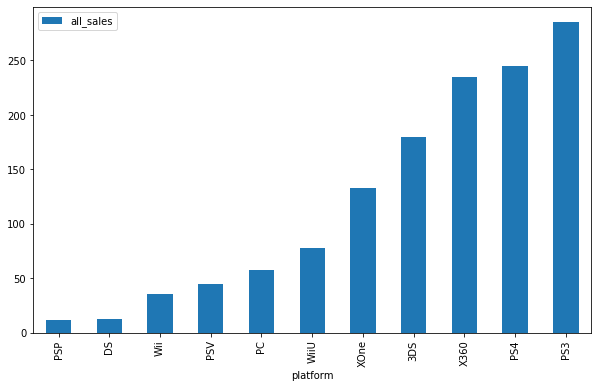

In [18]:
#построение графика продаж по платформам (топ-11) за актуальный период 2012-2015 г.
sales_by_platforms = pd.pivot_table(actual_games, index = 'platform', values = 'all_sales', aggfunc="sum")
sales_by_platforms.sort_values(by="all_sales").plot(kind='bar')

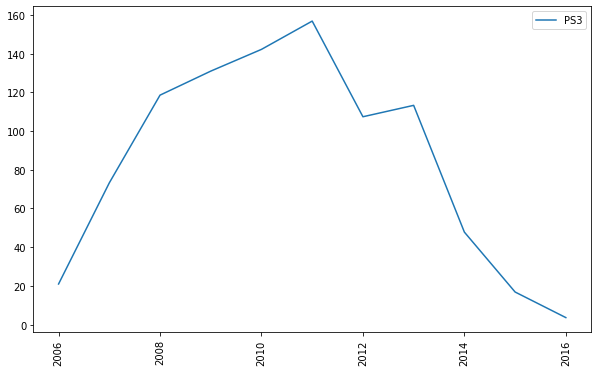

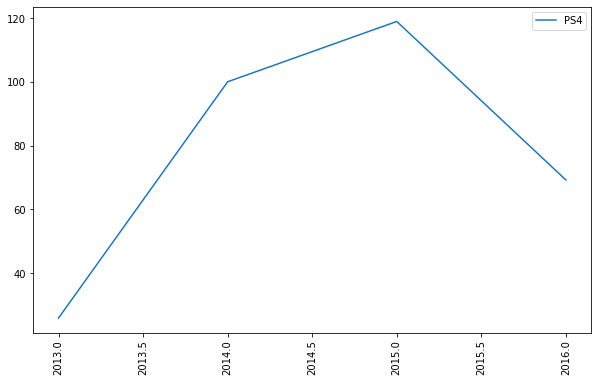

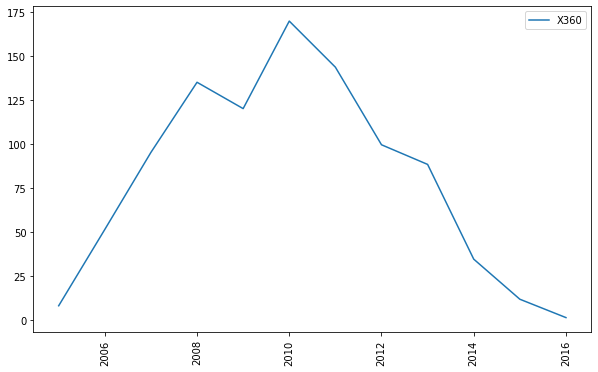

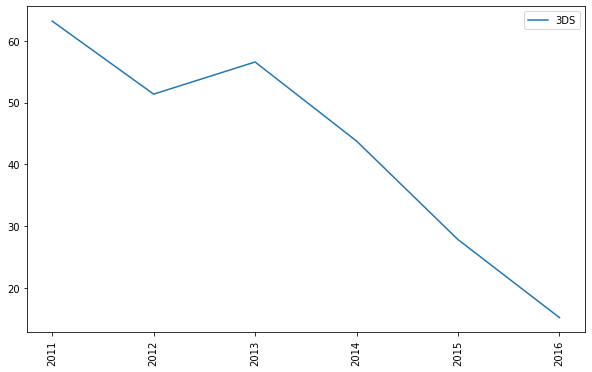

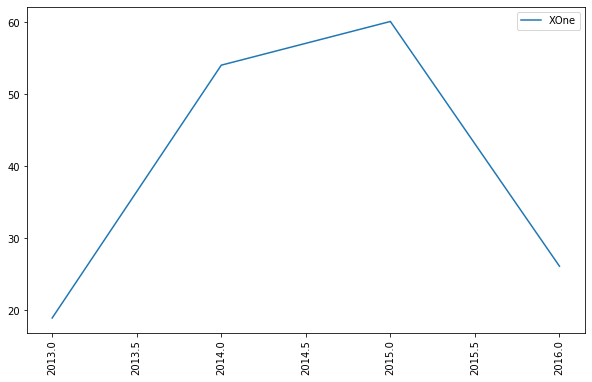

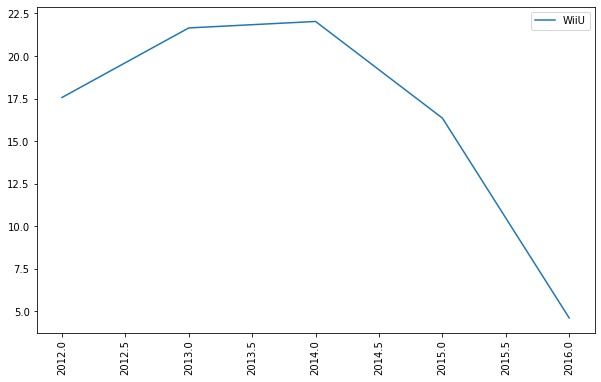

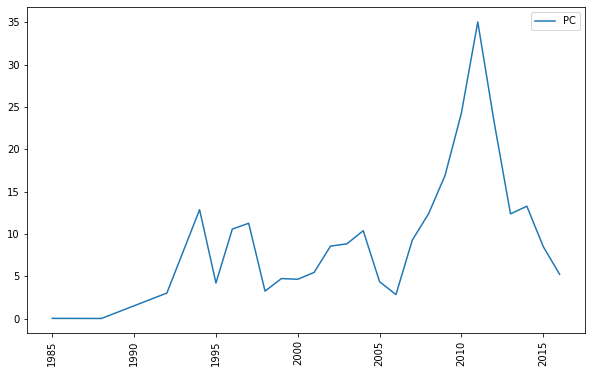

In [19]:
#определение топ-7 платформ
top_platforms = sales_by_platforms.sort_values(by="all_sales").nlargest(7, "all_sales", keep="first").index

#построение гистограмм для каждой платформы за актуальный период
for i in top_platforms:
    plt.plot(games[games['platform'] == i].groupby('year_of_release')['all_sales'].sum(), label=i)
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()

###  Вывод

Все актуальные платформы теряют в продажах. Но для X360, PS3, 3DS это началось раньше. Поэтому потенциально прибыльные платформы:
- PS4
- XOne
- WiiU

PC не может служить прибыльной платформой  для интернет-магазина, т.к. из-за распространения цифровых дистрибьюторов (Steam/GOG/Origin и т.д.) большинство людей покупают игры напрямую у них. Для консолей еще сохранился обычай покупать игры в магазине.

(0, 4)

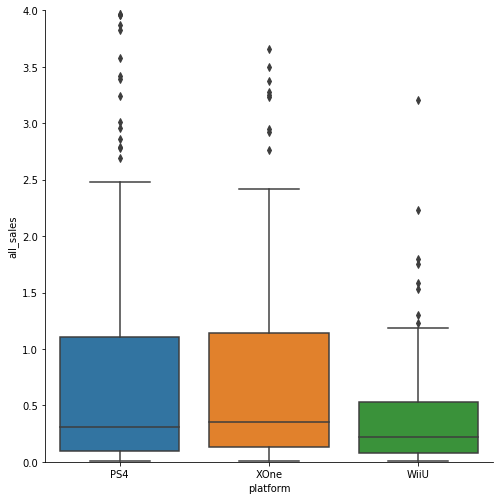

In [20]:
#оценка преспективных платформ
profitable_platforms_list = ['PS4', 'XOne', 'WiiU']

#построения "ящика с усами" для каждой платформы по продажам в актуальном периоде 2012-2015 г.
profitable_platforms = actual_games.query('(platform == "PS4") or (platform == "XOne") or (platform == "WiiU")')
sns.catplot(x = 'platform', y = 'all_sales', data = profitable_platforms, kind='box', aspect = 1, height = 7)
plt.ylim(0, 4)

count   228.00
mean      1.07
std       1.90
min       0.01
25%       0.10
50%       0.31
75%       1.10
max      14.63
Name: all_sales, dtype: float64


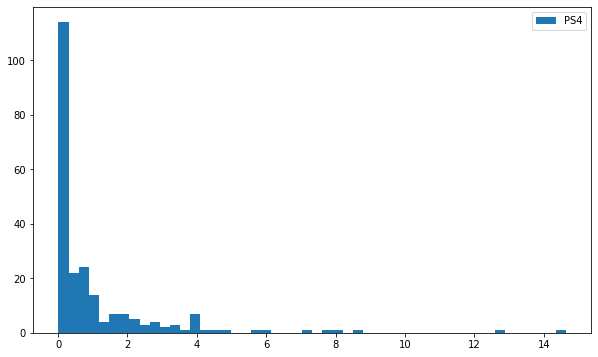

count   160.00
mean      0.83
std       1.18
min       0.01
25%       0.13
50%       0.35
75%       1.14
max       7.39
Name: all_sales, dtype: float64


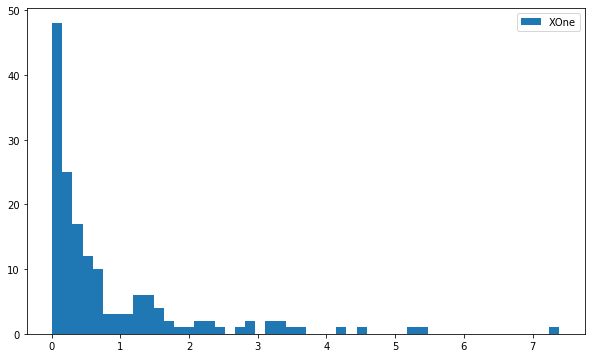

count   133.00
mean      0.58
std       1.11
min       0.01
25%       0.08
50%       0.22
75%       0.53
max       7.09
Name: all_sales, dtype: float64


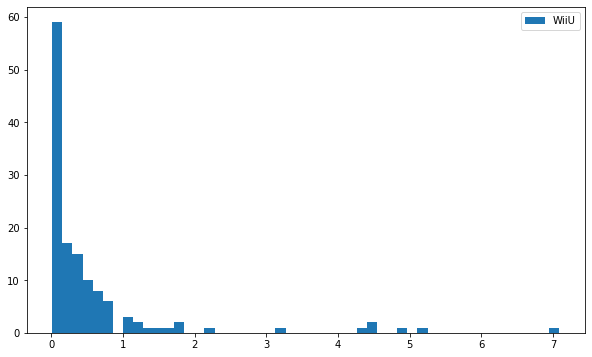

In [21]:
#построение графика по продажам для каждой преспективной платформы в актуальном периоде 2012-2015 г.
for i in profitable_platforms_list:
    print(actual_games.query('platform == @i')['all_sales'].describe())
    plt.hist(actual_games.query('platform == @i')['all_sales'], label=i, bins = 50)
    plt.legend()
    plt.show()

### Вывод

Средние продажи выше для XOne, возможно это из-за более стабильной и производительной платформы. Тем более, с её выходом, многие игры прошлых поколений имеют обратную совместимость, что дает низкий порог вхождения в новую консоль. Но общие продажи некоторых игр выше для PS4, т.к. на ней в это время выпускались многие эксклюзивы, ради которых и покупали эту консоль (God of War/Last Of Us/Uncharted/GT).

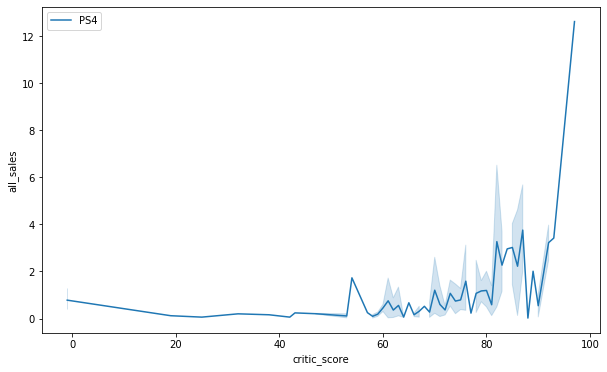

Коэффициент корреляции между колонкой critic_score и колонкой all_sales: 0.200948398790137


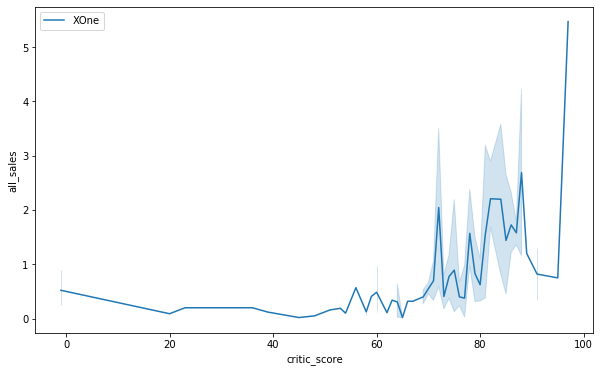

Коэффициент корреляции между колонкой critic_score и колонкой all_sales: 0.28500225179846644


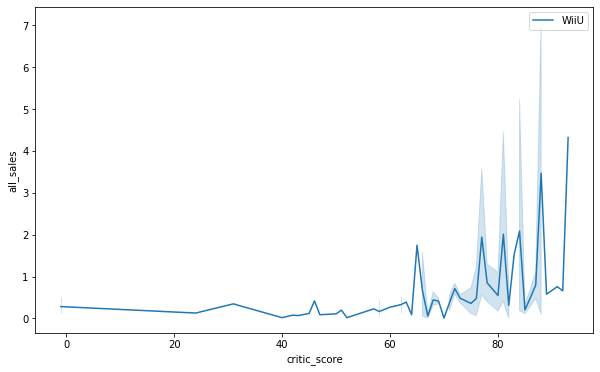

Коэффициент корреляции между колонкой critic_score и колонкой all_sales: 0.3069580278105597


In [22]:
#построение графиков продаж от оценок критиков
for i in profitable_platforms_list:
    sns.lineplot(x = 'critic_score', y = 'all_sales', data = actual_games.query('(platform == @i)'), label=i)
    plt.legend()
    plt.show()
    #расчет коэффицента корреляции
    print('Коэффициент корреляции между колонкой critic_score и колонкой all_sales:', 
          actual_games.query('(platform == @i)').corr().loc['critic_score', 'all_sales'])

### Вывод

Коэффициент  корреляции между колонкой critic_score и колонкой all_sales для всех актуальных платформ (PS4, XOne, WiiU) находится в пределах от 0.2 до 0.3, что говорит о слабой зависимости. Общая тенденция к увеличению - чем хвалебнее отзывы критиков, тем больше продаж. 

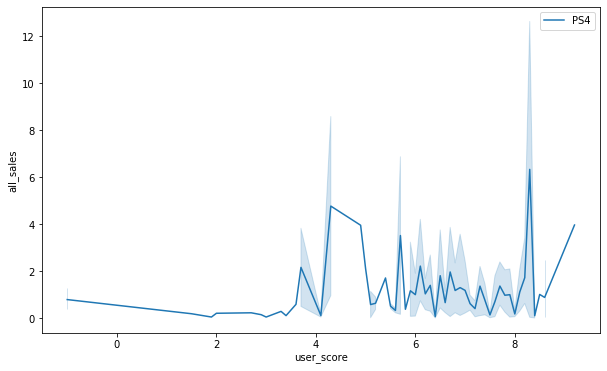

Коэффициент корреляции между колонкой user_score и колонкой all_sales: 0.0987139158066638


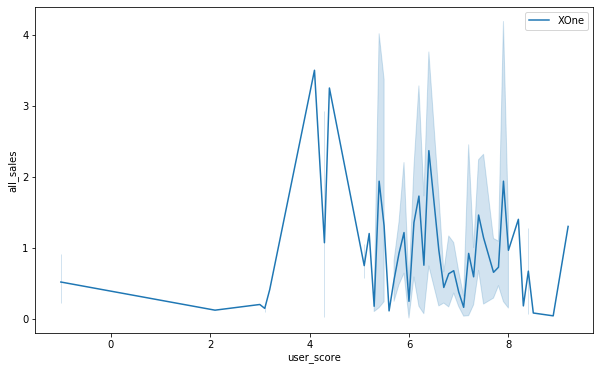

Коэффициент корреляции между колонкой user_score и колонкой all_sales: 0.14682052301785894


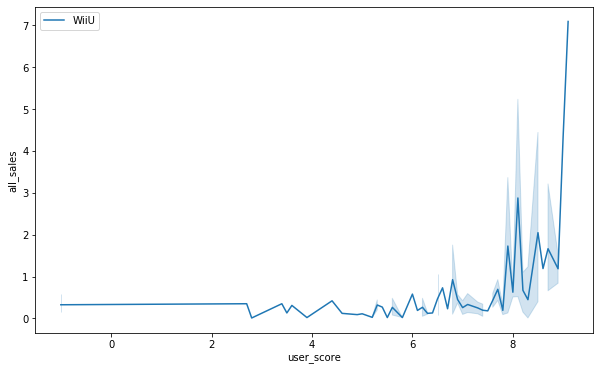

Коэффициент корреляции между колонкой user_score и колонкой all_sales: 0.26759593417485095


In [23]:
#построение графиков продаж от оценок пользователей
for i in profitable_platforms_list:
    sns.lineplot(x = 'user_score', y = 'all_sales', data = actual_games.query('(platform == @i)'), label=i)
    plt.legend()
    plt.show()
    #расчет коэффицента корреляции
    print('Коэффициент корреляции между колонкой user_score и колонкой all_sales:', 
          actual_games.query('(platform == @i)').corr().loc['user_score', 'all_sales'])

### Вывод

Коэффициент корреляции между колонкой user_score и колонкой all_sales для всех актуальных платформ (PS4, XOne, WiiU) находится в пределах от 0.09 до 0.26, что говорит о еще меньшей зависимости, чем зависимость между critic_score и all_sales. Наблюдаются всплески активности в промежутке от 3х до 6. Возможно, это те игры, мнение о которых критиков и игроков разошлись. Общая тенденция к увеличению наблюдается только у WiiU. Скорее всего это связано с тем, что пользователи покупают игры на основе мнения критиков.

       all_sales
count      12.00
mean      109.72
std       123.24
min         4.88
25%        31.33
50%        54.24
75%       161.84
max       411.01


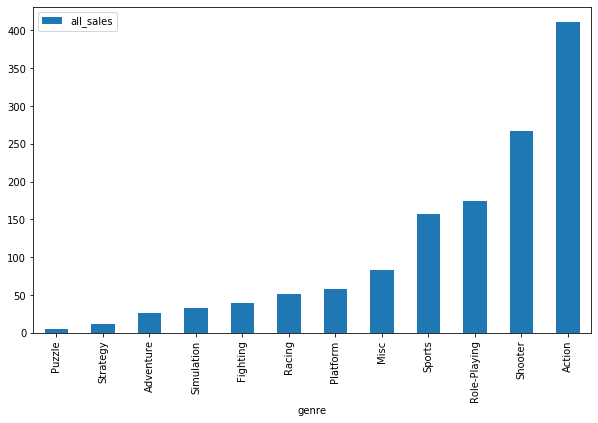

In [24]:
#построение графика продаж по жанрам
sales_by_genre = pd.pivot_table(actual_games, index = 'genre', values = 'all_sales', aggfunc="sum")
print(sales_by_genre.describe())
sales_by_genre.sort_values(by="all_sales").plot(kind='bar')

### Вывод

Самые продаваемые жанры (action/shooter) - те, у которых очень низкий порог вхождения. Это можно подтвердить тем, что если смотреть на этот график по прошлым годам (за период раньше 2012 года), то ролевые игры занимают куда более далекую позицию от верха, что можно связать с упрощением механик современных ролевых игр. Конечно, следует учитывать и то, что перечисленные жанры выходят куда чаще, чем новые стратегии, квесты, симуляторы. Но, тем не менее, чем проще - тем продаж массовому потребителю больше.

## Портрет пользователя каждого региона

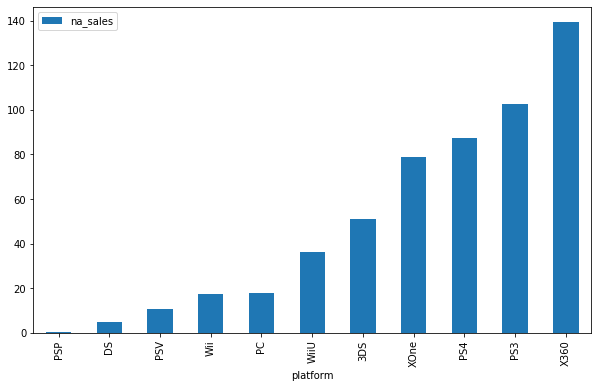

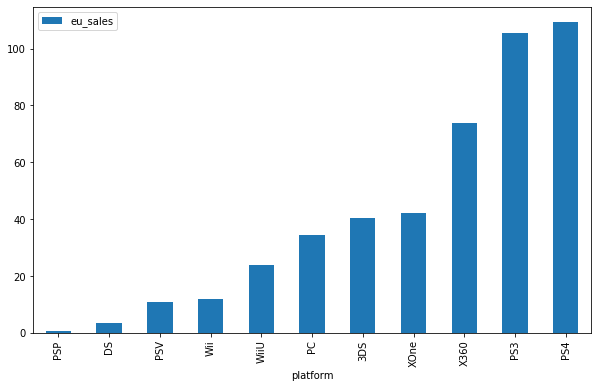

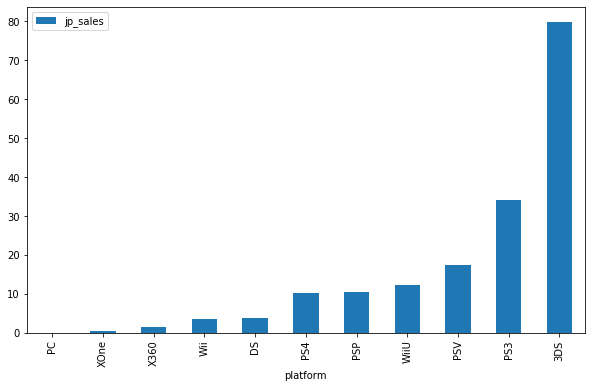

In [25]:
#построение графиков продаж по платформам в регионах (NA/EU/JP)

sales_by_na = pd.pivot_table(actual_games, index = 'platform', values = 'na_sales', aggfunc="sum")
sales_by_na.sort_values(by="na_sales").plot(kind='bar')

sales_by_eu = pd.pivot_table(actual_games, index = 'platform', values = 'eu_sales', aggfunc="sum")
sales_by_eu.sort_values(by="eu_sales").plot(kind='bar')

sales_by_jp = pd.pivot_table(actual_games, index = 'platform', values = 'jp_sales', aggfunc="sum")
sales_by_jp.sort_values(by="jp_sales").plot(kind='bar')

### Вывод

В трех регионах (NA/EU/JP) лидеры по продажам - консоли старого поколения, т.к. они успели накопить достаточно большую базу игроков. 

Но, что характерно, если для NA наиболее актуальная это - X360, а затем PS3, то в новых консолях позиции меняются местами. Сначала идет PS4, а затем XOne. Скорее всего, как описано выше, это связано с наличием большого количества эксклюзивов на старте продаж.

Для EU региона картина со старыми/новыми консолями остается прежней. Сначала идут PS4/PS3, затем X360/XOne. 

Для JP региона значительно лидирует 3DS. Скорее всего это связано с увлечением этого региона портативными консолями мобильными играми.

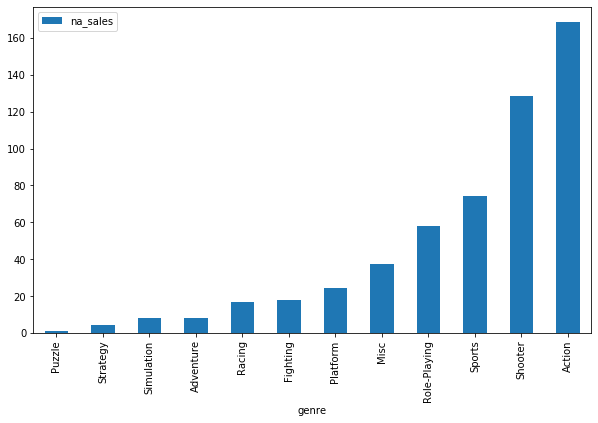

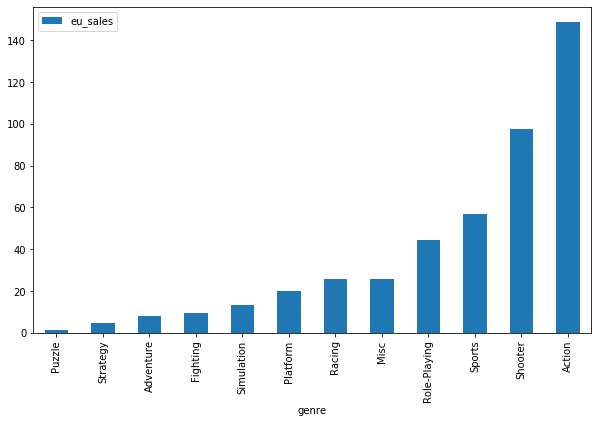

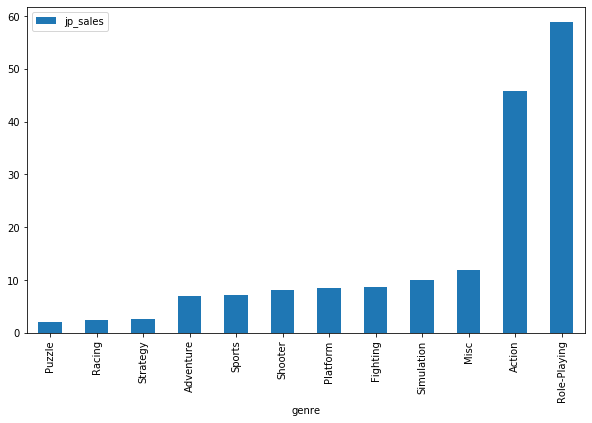

In [26]:
#построение графиков продаж по жанрам в регионах (NA/EU/JP)

genre_sales_by_na = pd.pivot_table(actual_games, index = 'genre', values = 'na_sales', aggfunc="sum")
genre_sales_by_na.sort_values(by="na_sales").plot(kind='bar')

genre_sales_by_eu = pd.pivot_table(actual_games, index = 'genre', values = 'eu_sales', aggfunc="sum")
genre_sales_by_eu.sort_values(by="eu_sales").plot(kind='bar')

genre_sales_by_jp = pd.pivot_table(actual_games, index = 'genre', values = 'jp_sales', aggfunc="sum")
genre_sales_by_jp.sort_values(by="jp_sales").plot(kind='bar')

### Вывод

Лидеры продаж для EU и NA не отличаются. Наиболее продаваемые - Action/Shooter/Sport/RPG. Хвост отличается незначительными рокировками.

Для JP региона характерно увеличение продаж ролевых игр (скорее всего в жанре jRPG, которые регулярно выходят на мобильных консолях), и лишь потом Action. На третей позиции стоит Misc - разные игры, не относящиеся к одному жанру (что тоже характерно для мобильных консолей).

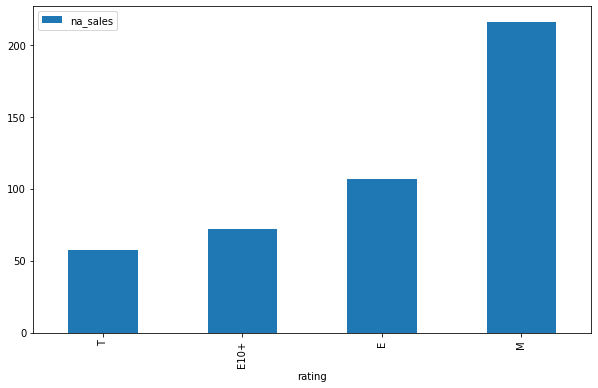

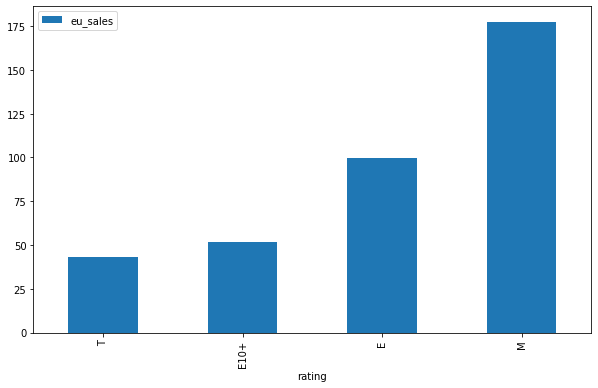

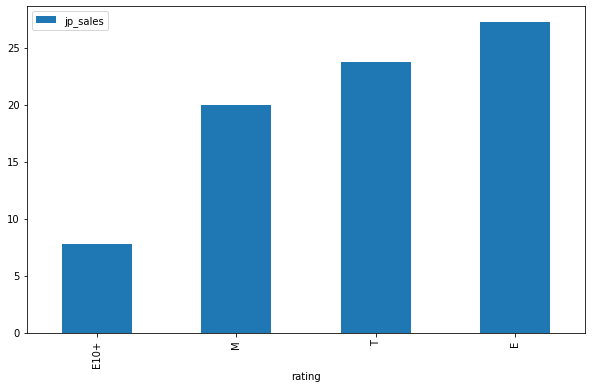

In [27]:
#построение графиков продаж по возрастному рейтингу в регионах (NA/EU/JP)

rating_sales_by_na = pd.pivot_table(actual_games.loc[actual_games['rating'] != -1], index = 'rating', values = 'na_sales', aggfunc="sum")
rating_sales_by_na.sort_values(by="na_sales").plot(kind='bar')

rating_sales_by_eu = pd.pivot_table(actual_games.loc[actual_games['rating'] != -1], index = 'rating', values = 'eu_sales', aggfunc="sum")
rating_sales_by_eu.sort_values(by="eu_sales").plot(kind='bar')

rating_sales_by_jp = pd.pivot_table(actual_games.loc[actual_games['rating'] != -1], index = 'rating', values = 'jp_sales', aggfunc="sum")
rating_sales_by_jp.sort_values(by="jp_sales").plot(kind='bar')

### Вывод

Для NA и EU регионов закономерности одинаковы - игры для игроков старше 17 лет продаются куда чаще остальных. Для JP региона самые распространенные игры с рейтингом для всех (6+), или для подростков (13+).

## Проверка гипотез

Необходимо сформировать нулевые и альтернативные гипотезы, согласно поставленным вопросам.

1) **Отличаются ли средние пользовательские рейтинги платформ Xbox One и PC?**
    - Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC не отличаются
    - Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC отличаются
    
2) **Отличаются ли средние пользовательские рейтинги жанров Action и Sport?**
    - Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sport не отличаются
    - Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sport отличаются

### Для платформ Xbox One и PC

Для дальнейшей проверки гипотез следует проверить распределения на нормальность.

In [28]:
#логическая индексация
xone_user_stat = actual_games.loc[(actual_games['platform'] == "XOne") & (actual_games['user_score'] != -1)]
pc_user_stat = actual_games.loc[(actual_games['platform'] == "PC") & (actual_games['user_score'] != -1)]

In [29]:
#проверка нормальности распределений
alpha = 0.05

#Xbox One
stat, p = stats.shapiro(xone_user_stat['user_score'])
print('Нулевая гипотеза: распределение пользовательских оценок для Xbox One нормальное')
print('Тест Шапиро-Вилка')
print('p-value:', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()

#PC
stat, p = stats.shapiro(pc_user_stat['user_score'])
print('Нулевая гипотеза: распределение пользовательских оценок для PC нормальное')
print('Тест Шапиро-Вилка')
print('p-value:', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нулевая гипотеза: распределение пользовательских оценок для Xbox One нормальное
Тест Шапиро-Вилка
p-value: 0.0008991601062007248
Отвергаем нулевую гипотезу

Нулевая гипотеза: распределение пользовательских оценок для PC нормальное
Тест Шапиро-Вилка
p-value: 1.6206367945414968e-06
Отвергаем нулевую гипотезу


### Вывод

По результатам проверки:
    - Нельзя сказать, что распределение пользовательских оценок для Xbox One нормальное
    - Нельзя сказать, что распределение пользовательских оценок для PC нормальное
    
Так как нельзя говорить о нормальности распределения, мы, кроме использования T-критерия Стьюдента для проверки гипотезы, будем использовать и U-критерий Манна — Уитни.

In [30]:
#проверка гипотезы с помощью U-критерия Манна — Уитни
stat, p = stats.mannwhitneyu(xone_user_stat['user_score'], pc_user_stat['user_score'], use_continuity=True)
print('U-критерий Манна — Уитни')
print('Нулевая гипотеза: cредние пользовательские оценки платформ Xbox One и PC не отличаются')
print('p-value:', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()

#проверка гипотезы с помощью T-критерия Стьюдента
stat, p = stats.ttest_ind(xone_user_stat['user_score'], pc_user_stat['user_score'])
print('T-критерий Стьюдента')
print('Нулевая гипотеза: cредние пользовательские оценки платформ Xbox One и PC не отличаются')
print('p-value:', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

U-критерий Манна — Уитни
Нулевая гипотеза: cредние пользовательские оценки платформ Xbox One и PC не отличаются
p-value: 0.22101632851214464
Не получилось отвергнуть нулевую гипотезу

T-критерий Стьюдента
Нулевая гипотеза: cредние пользовательские оценки платформ Xbox One и PC не отличаются
p-value: 0.9463196313131612
Не получилось отвергнуть нулевую гипотезу


### Вывод

Согласно результатам исследования:
- гипотеза о равенстве cредних пользовательских оценок для платформ Xbox One и PC не отвергается.
- возможно, это связано с тем, что на актуальный период (2012-2015 годы) большинство игр выходят как на PC так и на консолях, без значительных изменений.

### Для жанров Action и Sports

Для дальнейшей проверки гипотез следует проверить распределения на нормальность.

In [31]:
#логическая индексация
action_user_stat = actual_games.loc[(actual_games['genre'] == "Action") & (actual_games['user_score'] != -1)]
sport_user_stat = actual_games.loc[(actual_games['genre'] == "Sports") & (actual_games['user_score'] != -1)]

In [32]:
#проверка нормальности распределений
alpha = 0.05

#Xbox One
stat, p = stats.shapiro(action_user_stat['user_score'])
print('Нулевая гипотеза: распределение пользовательских оценок для жанра Action нормальное')
print('Тест Шапиро-Вилка')
print('p-value:', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()

#PC
stat, p = stats.shapiro(sport_user_stat['user_score'])
print('Нулевая гипотеза: распределение пользовательских оценок для жанра Sports нормальное')
print('Тест Шапиро-Вилка')
print('p-value:', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нулевая гипотеза: распределение пользовательских оценок для жанра Action нормальное
Тест Шапиро-Вилка
p-value: 1.7092787121204063e-15
Отвергаем нулевую гипотезу

Нулевая гипотеза: распределение пользовательских оценок для жанра Sports нормальное
Тест Шапиро-Вилка
p-value: 0.000856039288919419
Отвергаем нулевую гипотезу


### Вывод

По результатам проверки:
    - Нельзя сказать, что распределение пользовательских оценок для жанра Action нормальное
    - Нельзя сказать, что распределение пользовательских оценок для жанра Sports нормальное
    
Так как нельзя говорить о нормальности распределения, мы, кроме использования T-критерия Стьюдента для проверки гипотезы, будем использовать и U-критерий Манна — Уитни.

In [33]:
#проверка гипотезы с помощью U-критерия Манна — Уитни
stat, p = stats.mannwhitneyu(action_user_stat['user_score'], sport_user_stat['user_score'], use_continuity=True)
print('U-критерий Манна — Уитни')
print('Нулевая гипотеза: средние пользовательские оценки жанров Action и Sport не отличаются')
print('p-value:', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()

#проверка гипотезы с помощью T-критерия Стьюдента
stat, p = stats.ttest_ind(action_user_stat['user_score'], sport_user_stat['user_score'])
print('T-критерий Стьюдента')
print('Нулевая гипотеза: средние пользовательские оценки жанров Action и Sport не отличаются')
print('p-value:', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

U-критерий Манна — Уитни
Нулевая гипотеза: средние пользовательские оценки жанров Action и Sport не отличаются
p-value: 1.4143207372433288e-21
Отвергаем нулевую гипотезу

T-критерий Стьюдента
Нулевая гипотеза: средние пользовательские оценки жанров Action и Sport не отличаются
p-value: 1.3744684534520844e-23
Отвергаем нулевую гипотезу


### Вывод

Согласно результатам исследования:
- гипотеза о равенстве средних пользовательских оценок жанров Action и Sport отвергается.

## Общий вывод

#### Проведены следющие этапы работ:
1) Предобработка данных

2) Исследовательский анализ данных

3) Составлен портрет пользователя для каждого региона

4) Статистический анализ данных для:
    - платформ Xbox One и PC
    - жанров Action и Sports

#### По этапам работ:

**Предобработка данных:**

1. Исследованы причины пропусков в столбцах

2. Удалены строки с пропусками в колонках "name" и "year_of_release"

3. В остальных колонках пропуски заменены на флаги (-1)

4. Колонки преобразованы в соответствующие, с учетом типов данных

5. Добавлена колонка для суммарных продаж по всем регионам (all_sales)

**Исследовательский анализ данных**

1. Актуализирован период, за который следует рассматривать статистику (2012 - 2015 г., current gen)

2. Актуализированы платформы (выбраны потенциально прибыльные), по которым следует рассматривать статистику (XBox One, PS4, WiiU)

3. Согласно проведенному исследованию сделаны следующие выводы:
    - Средние продажи выше для XOne. При этом некоторые общие продажи выше для PS4. Возможно это связано эксклюзивность игры.
    - Чем лучше отзывы критиков, тем больше продаж будет у игры. При этом, для пользовательских оценок, не наблюдается такой явной зависимости.
    - Самые продаваемые жанры - action и shooter
    
**Портрет пользователя**

Для NA:
- Наиболее популярные платформы старого поколения - X360 и PS3. Нового поколения - PS4 и XOne.
- Наиболее популярные жанры - Action/Shooter/Sport/RPG

Для EU:
- Наиболее популярные платформы старого поколения - PS3 и X360. Нового поколения - PS4 и XOne.
- Наиболее популярные жанры - Action/Shooter/Sport/RPG

Для JP:
- Наиболее популярная платформа - 3DS.
- Наиболее популярные жанры - RPG и Action

**Статистический анализ данных**

Для платформ Xbox One и PC:
- гипотеза о равенстве cредних пользовательских оценок для платформ Xbox One и PC не отвергается.
- возможно это связано с тем, что на актуальный период (2012-2015 годы) большинство игр выходят как на PC, так и на консолях, без значительных изменений.

Для жанров Action и Sports:
- гипотеза о равенстве средних пользовательских оценок жанров Action и Sport отвергается.

**Итог**

По результатам исследования можно сказать, что рекламные компании в рамках регионов NA и EU следует концентрировать на консолях нового поколения (XOne/ PS4). При этом следует следить за выходом эксклюзивов для каждой платформы (особенно в жанрах Action), и смотреть на предварительные оценки критиков. Пользовательские рейтинги не так важны, тем более что они появляются уже после выхода игры, в отличие от оценок критиков, которым дают опробовать игру до момента релиза.

Для региона JP следует сделать ставку на портативные консоли и игры в жанре RPG (jRPG).